In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt

import seaborn as sns

from PIL import Image

In [2]:
df=pd.read_csv("twitter_dataset.csv")

In [3]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,30/01/2023 11:00
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,02/01/2023 22:45
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,18/01/2023 11:25
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,10/04/2023 22:06
4,5,carlwarren,Involve sense former often approach government...,27,80,24/01/2023 07:12


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Tweet_ID,Retweets,Likes
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,49.721200,49.929300
std,2886.89568,28.948856,28.877193
min,1.00000,0.000000,0.000000
25%,2500.75000,25.000000,25.000000
50%,5000.50000,49.000000,50.000000
75%,7500.25000,75.000000,75.000000
max,10000.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Calculate summary statistics
mean_retweets = df['Retweets'].mean()
median_likes = df['Likes'].median()
correlation = df['Retweets'].corr(df['Likes'])

In [10]:
import pandas as pd
from textblob import TextBlob  # Import TextBlob

# Assuming df is your DataFrame and 'Text' is the column with tweet text
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [11]:
# Print results
print("Mean Retweets:", mean_retweets)
print("Median Likes:", median_likes)
print("Correlation between Retweets and Likes:", correlation)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034798


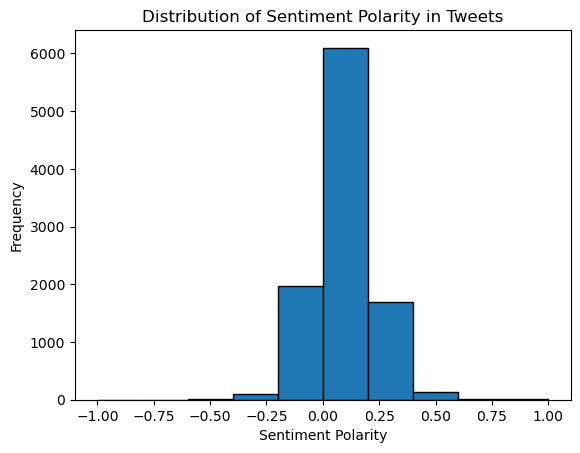

In [12]:
# Plotting sentiment polarity distribution
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()

In [13]:
# Print the number of rows and columns in the dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Calculate the average values of retweets and likes
avg_retweets = df['Retweets'].mean()
avg_likes = df['Likes'].mean()
print("Average Retweets:", avg_retweets)
print("Average Likes:", avg_likes)

Number of Rows: 10000
Number of Columns: 7
Average Retweets: 49.7212
Average Likes: 49.9293


In [14]:
# Find the top users with the highest number of retweets
top_users = df.groupby('Username')['Retweets'].sum().nlargest(10)
print("Top Users by Retweets:")
print(top_users)

Top Users by Retweets:
Username
pjohnson           362
awilliams          306
fsmith             301
wmitchell          269
nbrown             267
davidsmith         263
christopher64      261
amiller            253
ehernandez         251
jessicawilliams    251
Name: Retweets, dtype: int64


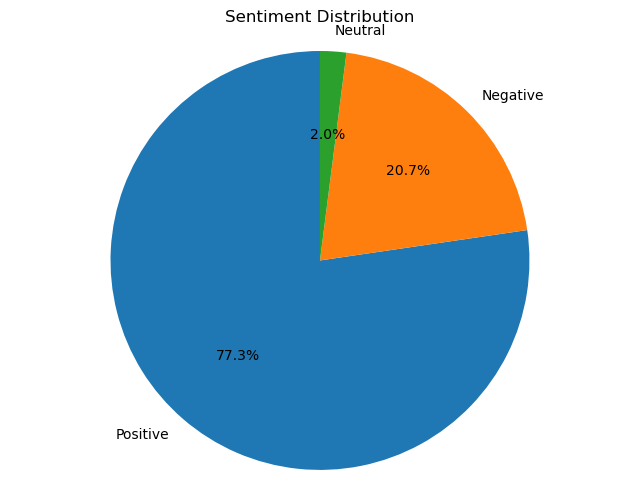

In [15]:
# Perform sentiment analysis on tweet text
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculate the count of each sentiment category
sentiment_counts = df['Sentiment Category'].value_counts()

# Plot a pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

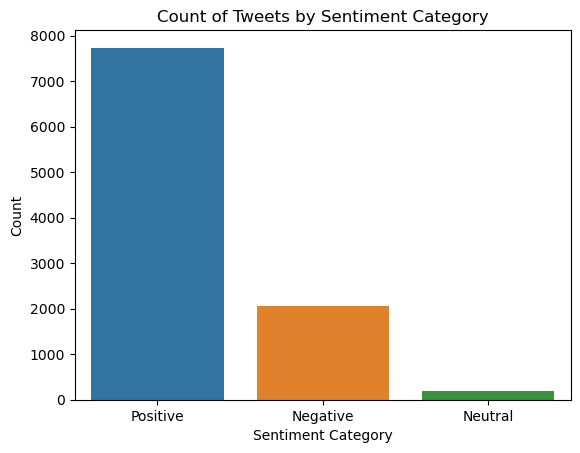

In [16]:
# Plot the count of tweets by sentiment category
sns.countplot(x='Sentiment Category', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()

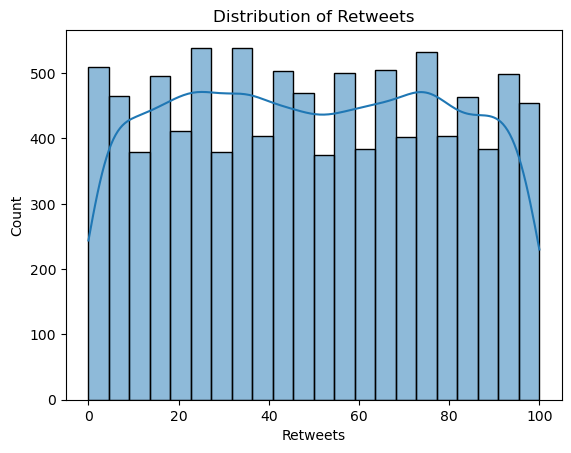

In [17]:
# Plot the distribution of retweets
sns.histplot(df['Retweets'], kde=True)
plt.xlabel('Retweets')
plt.ylabel('Count')
plt.title('Distribution of Retweets')
plt.show()

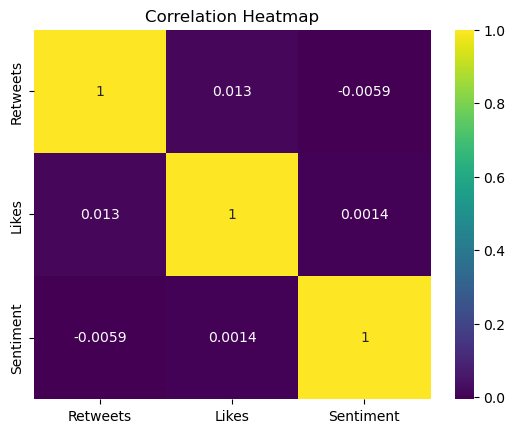

In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['Retweets', 'Likes', 'Sentiment']].corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()